In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/cleaned_food_analysis.csv")
df.head()

,Order_ID,Customer_ID,Customer_Age,Customer_Gender,City,Area,Restaurant_ID,Restaurant_Name,Cuisine_Type,Order_Date,...,Final_Amount,Payment_Mode,Order_Status,Cancellation_Reason,Delivery_Partner_ID,Delivery_Rating,Restaurant_Rating,Order_Day,Peak_Hour,Profit_Margin
0,ORD000001,CUST6948,19.0,Male,Hyderabad,Central,RES936,Restaurant_29,Chinese,10/20/2024,...,1197.0,upi,Delivered,Not Cancelled,DP563,5.0,4.4,Weekend,True,0.13
1,ORD000002,CUST6515,39.0,Female,Chennai,North,RES689,Restaurant_419,Chinese,8/12/2024,...,4849.0,cod,Delivered,Not Cancelled,DP369,5.0,4.7,Weekday,True,0.48
2,ORD000003,CUST1765,39.0,Male,Delhi,South,RES723,Restaurant_244,Arabian,12/8/2024,...,737.0,wallet,Delivered,Not Cancelled,DP580,4.0,4.9,Weekend,True,0.08
3,ORD000004,CUST2744,39.0,Male,Mumbai,Central,RES951,Restaurant_178,Chinese,10/8/2024,...,0.0,upi,Cancelled,Late Delivery,DP155,NaN,3.4,Weekday,Non-Peak,0.00
4,ORD000005,CUST4389,57.0,Female,Chennai,South,RES419,Restaurant_262,Chinese,2/4/2024,...,352.0,card,Delivered,Not Cancelled,DP728,2.0,4.4,Weekend,False,0.12


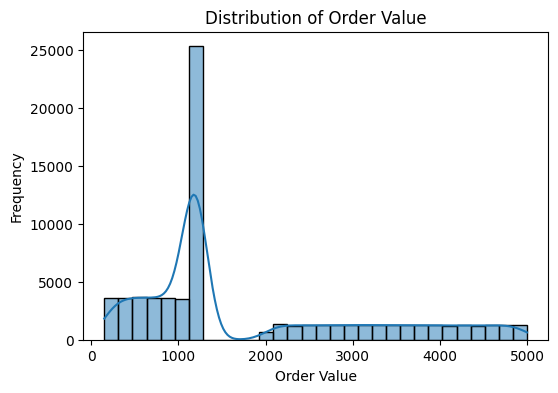

In [3]:
plt.figure(figsize=(6,4))
sns.histplot(df['Order_Value'], bins=30, kde=True)
plt.title("Distribution of Order Value")
plt.xlabel("Order Value")
plt.ylabel("Frequency")
plt.show()

# Insight:
# Most orders fall within a moderate price range, indicating price-sensitive customers
# with fewer high-value orders.

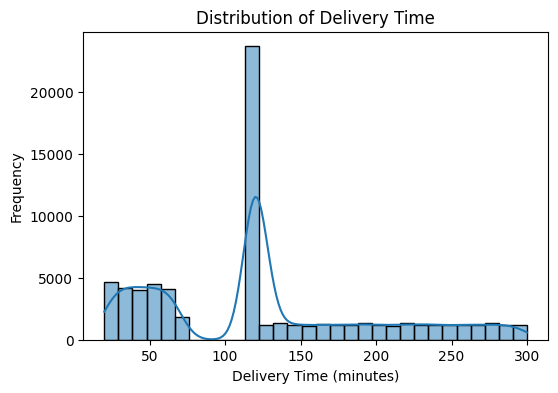

In [4]:
plt.figure(figsize=(6,4))
sns.histplot(df['Delivery_Time_Min'], bins=30, kde=True)
plt.title("Distribution of Delivery Time")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.show()

# Insight:
# Majority of deliveries are completed within an acceptable time window,
# but longer delays exist, impacting customer satisfaction.


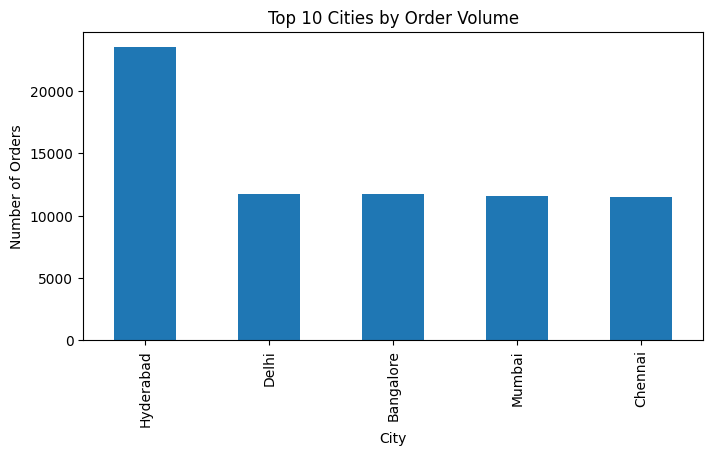

In [5]:
city_orders = df['City'].value_counts().head(10)

plt.figure(figsize=(8,4))
city_orders.plot(kind='bar')
plt.title("Top 10 Cities by Order Volume")
plt.xlabel("City")
plt.ylabel("Number of Orders")
plt.show()

# Insight:
# A few major cities contribute the majority of orders, making them
# key focus areas for operational optimization.


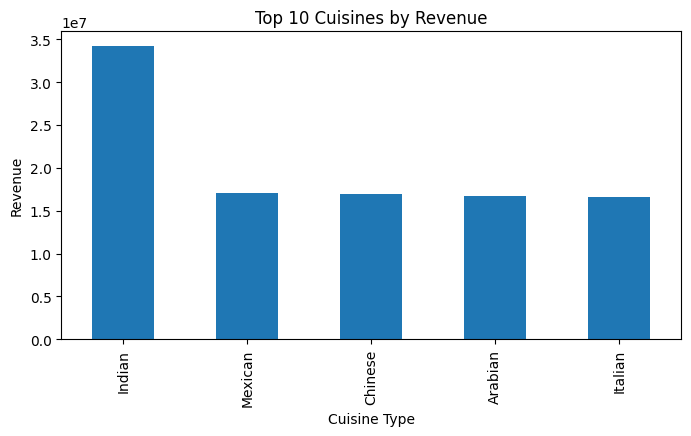

In [ ]:
cuisine_revenue = (
    df.groupby('Cuisine_Type')['Final_Amount']
    .sum()
    .sort_values(ascending=False)
    .head(10))
plt.figure(figsize=(8,4))
cuisine_revenue.plot(kind='bar')
plt.title("Top 10 Cuisines by Revenue")
plt.xlabel("Cuisine Type")
plt.ylabel("Revenue")
plt.show()

# Insight:
# Certain cuisines generate higher revenue, indicating strong customer preference
# and opportunities for targeted promotions.


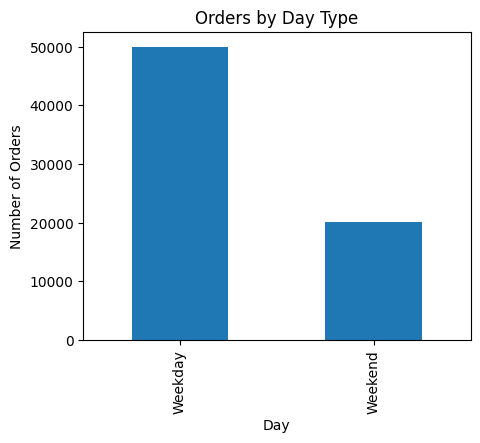

In [7]:
order_day_counts = df['Order_Day'].value_counts()

plt.figure(figsize=(5,4))
order_day_counts.plot(kind='bar')
plt.title("Orders by Day Type")
plt.xlabel("Day")
plt.ylabel("Number of Orders")
plt.show()

# Insight:
# Order demand varies by day, with noticeable spikes during weekends
# due to higher leisure consumption.


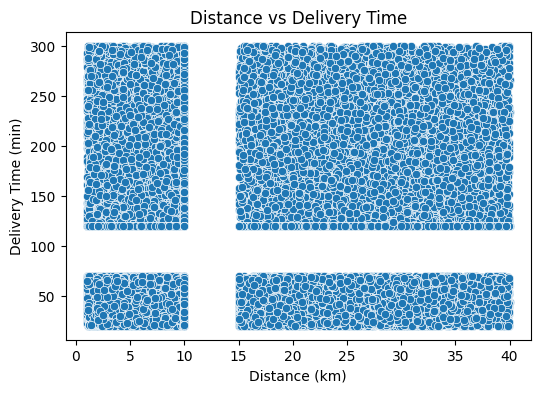

In [8]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Distance_km'], y=df['Delivery_Time_Min'])
plt.title("Distance vs Delivery Time")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (min)")
plt.show()

# Insight:
# Longer delivery distances generally result in increased delivery time,
# highlighting logistics efficiency challenges.


In [ ]:

df['Order_Status'].value_counts(normalize=True) * 100


Order_Status
Delivered    84.871312
Cancelled    15.128688
Name: proportion, dtype: float64

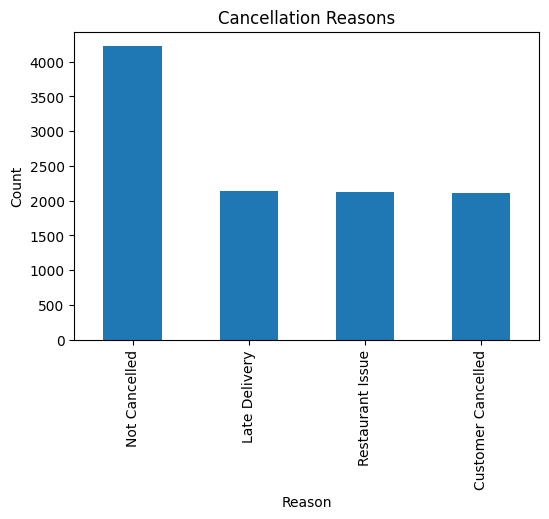

In [10]:
cancel_reason = df[df['Order_Status'] == 'Cancelled']['Cancellation_Reason'].value_counts()

plt.figure(figsize=(6,4))
cancel_reason.plot(kind='bar')
plt.title("Cancellation Reasons")
plt.xlabel("Reason")
plt.ylabel("Count")
plt.show()

# Insight:
# Most cancellations are driven by delivery delays and operational issues,
# emphasizing the need for better logistics planning.


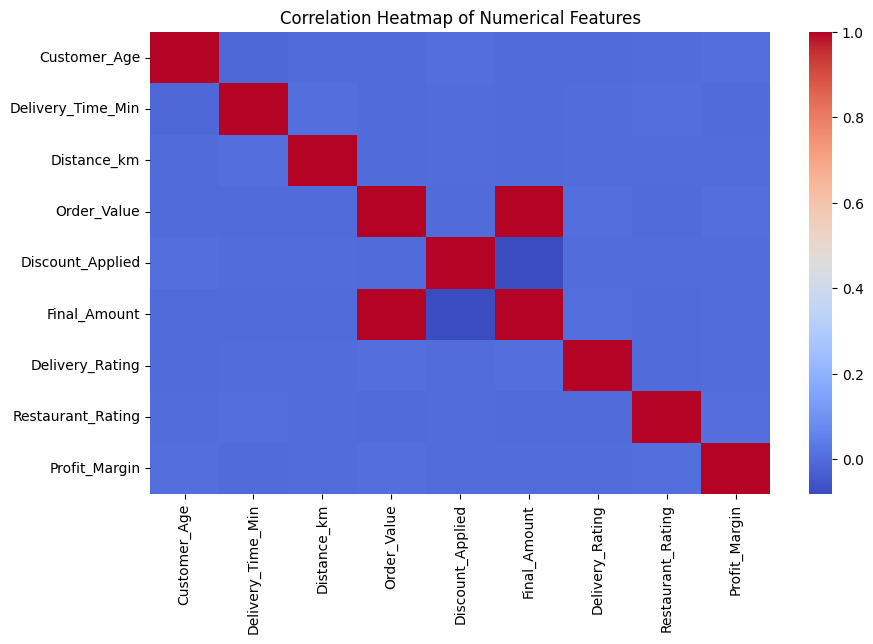

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df = numeric_df.dropna()
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Insight:
# Delivery distance and delivery time show positive correlation,
# while discounts and profit margin influence final revenue and profitability.
